# Predictive Analytics : Vehicle Prices

##### Nama: Azel Fabian Azmi

## Deskripsi Proyek

Harga kendaraan sering kali menjadi salah satu faktor utama yang mempengaruhi keputusan pembelian atau penjualan. Namun, menentukan harga kendaraan yang wajar dapat menjadi tantangan, terutama ketika mempertimbangkan berbagai faktor yang memengaruhi harga kendaraan, seperti tahun pembuatan, merek, tipe mesin, jarak tempuh (mileage), dan banyak atribut teknis lainnya. Banyak pembeli dan penjual yang kesulitan dalam mendapatkan harga yang sesuai dengan kondisi kendaraan, karena tidak memiliki referensi harga yang tepat berdasarkan data yang ada di pasar. Sebagian besar transaksi jual beli kendaraan masih mengandalkan penilaian subyektif atau informasi pasar yang terbatas, yang dapat menyebabkan ketidaksesuaian harga, baik terlalu mahal atau terlalu murah. Hal ini menciptakan ketidakpastian dan ketidakseimbangan informasi antara penjual dan pembeli. Sebagai contoh, kendaraan yang baru diproduksi dengan fitur premium mungkin dijual dengan harga yang tidak proporsional, sementara kendaraan bekas dengan kondisi baik mungkin dihargai lebih rendah dari nilai pasar sebenarnya. Masalah lainnya adalah adanya perbedaan harga yang besar antara kendaraan dengan spesifikasi yang hampir sama, hanya karena perbedaan kecil dalam faktor seperti warna eksterior, kondisi mesin, atau lokasi penjualan. Ini menjadi tantangan bagi calon pembeli yang ingin memastikan bahwa mereka mendapatkan harga yang adil sesuai dengan kondisi dan kualitas kendaraan yang mereka beli.

## Import Library

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import kagglehub
import re
import math

## Data Understanding

### Data Loading

| Jenis | Keterangan |
| ------ | ------ |
| Title | _Vehicle Price Prediction_ |
| Source | [Kaggle](https://www.kaggle.com/datasets/khwaishsaxena/vehicle-price-prediction-dataset/data) |
| Maintainer | [Khwaish Saxena](https://www.kaggle.com/khwaishsaxena) |
| License | Community Data License Agreement – Sharing, Version 1.0 |
| Visibility | Publik |
| Tags | _Business, Automobiles and Vehicles, Regression_ |
| View | 448 |

In [32]:
# Load Vechile Price.csv dari folder Dataset
df = pd.read_csv("Dataset/Vehicle Price.csv")

### Dataset Info

In [33]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

Dataset ini berisi **1002 entri** dengan **17 kolom** yang mencakup informasi terkait kendaraan. Berikut adalah struktur dan deskripsi setiap kolom:

**1. name** (object)
- **Deskripsi**: Nama lengkap kendaraan, mencakup tahun, model, dan trim.
- **Contoh**: "2024 Jeep Wagoneer Series II"

**2. description** (object)
- **Deskripsi**: Deskripsi singkat tentang kendaraan, termasuk fitur-fitur tambahan atau informasi terkait kendaraan.
- **Contoh**: "\n\nHeated Leather Seats, Nav System, Apple CarPlay, Back-Up Camera"

**3. make** (object)
- **Deskripsi**: Merek atau produsen kendaraan.
- **Contoh**: "Jeep", "RAM", "GMC"

**4. model** (object)
- **Deskripsi**: Model kendaraan, yang sering kali merupakan varian dari merek yang sama.
- **Contoh**: "Wagoneer", "Grand Cherokee", "3500"

**5. year** (int64)
- **Deskripsi**: Tahun pembuatan kendaraan.
- **Contoh**: 2024, 2023

**6. price** (float64)
- **Deskripsi**: Harga kendaraan dalam satuan dolar.
- **Contoh**: 74600.0, 50170.0

**7. engine** (object)
- **Deskripsi**: Jenis dan spesifikasi mesin kendaraan, termasuk kapasitas dan tipe.
- **Contoh**: "24V GDI DOHC Twin Turbo", "6.2L V-8 gasoline direct injection"

**8. cylinders** (float64)
- **Deskripsi**: Jumlah silinder mesin kendaraan.
- **Contoh**: 6.0, 8.0

**9. fuel** (object)
- **Deskripsi**: Jenis bahan bakar yang digunakan oleh kendaraan.
- **Contoh**: "Gasoline", "Diesel"

**10. mileage** (float64)
- **Deskripsi**: Jarak tempuh kendaraan dalam satuan mil.
- **Contoh**: 10.0, 1.0, 32.0

**11. transmission** (object)
- **Deskripsi**: Jenis transmisi kendaraan.
- **Contoh**: "8-Speed Automatic", "Automatic", "6-Speed Automatic"

 **12. trim** (object)
- **Deskripsi**: Varian atau trim dari kendaraan, yang mencakup fitur-fitur tertentu.
- **Contoh**: "Series II", "Laredo", "Denali"

**13. body** (object)
- **Deskripsi**: Jenis bodi kendaraan, seperti SUV, Pickup Truck, dan lain-lain.
- **Contoh**: "SUV", "Pickup Truck"

**14. doors** (float64)
- **Deskripsi**: Jumlah pintu kendaraan.
- **Contoh**: 4.0

**15. exterior_color** (object)
- **Deskripsi**: Warna eksterior kendaraan.
- **Contoh**: "White", "Metallic", "Summit White"

**16. interior_color** (object)
- **Deskripsi**: Warna interior kendaraan.
- **Contoh**: "Global Black", "Teak/Light Shale", "Black"

**17. drivetrain** (object)
- **Deskripsi**: Tipe drivetrain kendaraan, seperti penggerak empat roda (4WD) atau penggerak dua roda (FWD).
- **Contoh**: "Four-wheel Drive", "All-wheel Drive"

## Exploratory Data Analysis (EDA)

In [35]:
df.shape

(1002, 17)

In [36]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


- **Kolom `year`** mencatat tahun pembuatan kendaraan. Rata-rata tahun pembuatan kendaraan adalah 2023, dengan sebagian besar kendaraan dibuat pada tahun 2024. Rentang tahun berada antara 2023 hingga 2025, yang menunjukkan bahwa dataset ini sebagian besar terdiri dari kendaraan terbaru.

- **Kolom `price`** mencatat harga kendaraan dalam dolar. Rata-rata harga kendaraan adalah $50,202.99, dengan harga minimum mencapai $0, yang bisa jadi disebabkan oleh data yang hilang atau salah input. Harga maksimum mencapai $195,895, yang menunjukkan adanya kendaraan dengan harga jauh lebih tinggi, mungkin karena model premium atau kendaraan khusus. Sebagian besar harga berada di kisaran $36,900 hingga $58,717, mencerminkan harga kendaraan yang lebih umum di pasar.

- **Kolom `cylinders`** mencatat jumlah silinder pada mesin kendaraan. Rata-rata jumlah silinder adalah 4.98, dengan sebagian besar kendaraan memiliki 4 atau 6 silinder. Ada juga beberapa kendaraan yang memiliki 8 silinder, meskipun jumlahnya relatif sedikit. Nilai minimum untuk jumlah silinder adalah 0, yang kemungkinan disebabkan oleh data yang tidak valid.

- **Kolom `mileage`** mencatat jarak tempuh kendaraan dalam mil. Rata-rata jarak tempuh adalah 69 mil, dengan sebagian besar kendaraan memiliki jarak tempuh yang rendah, berada di bawah 14 mil. Namun, ada kendaraan dengan jarak tempuh ekstrem mencapai 9,711 mil, yang bisa jadi merupakan outlier atau kendaraan dengan penggunaan intensif. Rentang jarak tempuh yang luas menunjukkan variasi besar dalam data.

- **Kolom `doors`** mencatat jumlah pintu kendaraan. Rata-rata jumlah pintu adalah 3.94, dengan sebagian besar kendaraan memiliki 4 pintu. Rentang nilai untuk jumlah pintu berada antara 2 hingga 5 pintu, menunjukkan bahwa kebanyakan kendaraan dalam dataset ini adalah sedan atau SUV yang umumnya memiliki 4 pintu.

### Pengecekan Data Duplikat dan Nilai Kosong

In [37]:
print(df.duplicated().sum())

24


In [38]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

Dari kedua cell code diatas menunjukkan bahwa terdapat 24 baris yang terduplikasi dan beberapa nilai yang kosong nilainya. Maka dilakukannya pengisian/penghapusan terhadap nilai tersebut untuk data menjadi bersih.

In [39]:
# Hapus duplikat
df = df.drop_duplicates()

# Tangani missing values
# Numerik: isi dengan rata-rata
df['price'] = df['price'].fillna(df['price'].mean())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mean())
df['mileage'] = df['mileage'].fillna(df['mileage'].mean())
df['doors'] = df['doors'].fillna(df['doors'].mean())

# Kategorikal: isi dengan modus (nilai yang paling sering muncul)
df['description'] = df['description'].fillna('')
df['engine'] = df['engine'].fillna(df['engine'].mode()[0])
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['exterior_color'] = df['exterior_color'].fillna(df['exterior_color'].mode()[0])
df['interior_color'] = df['interior_color'].fillna(df['interior_color'].mode()[0])

# Periksa ulang
duplicates_after = df.duplicated().sum()
missing_after = df.isnull().sum()

In [40]:
print(duplicates_after)

0


In [41]:
print(missing_after)

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


### Cek Data Unique

In [42]:
df.nunique().sort_values(ascending=False)

price             860
description       762
name              358
exterior_color    263
trim              197
model             153
engine            100
mileage            96
interior_color     91
transmission       38
make               28
body                8
fuel                7
cylinders           6
doors               5
drivetrain          4
year                3
dtype: int64

### Visualiasi (Multivariate Analysis)

#### Korelasi Data Numerik

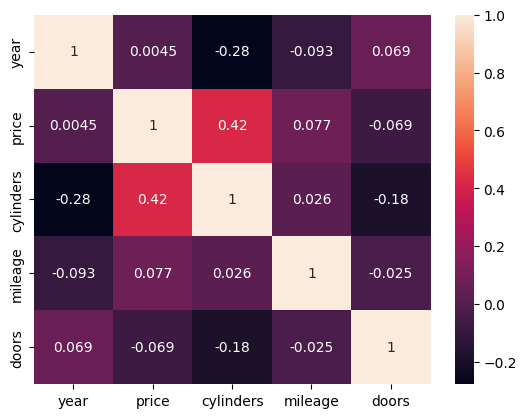

In [43]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

Heatmap ini menggambarkan korelasi antar fitur numerik seperti `year`, `price`, `cylinders`, `mileage`, dan `doors`. Temuan utama:
- Korelasi positif sedang antara `year` dan `price` menunjukkan bahwa kendaraan yang lebih baru cenderung memiliki harga lebih tinggi.
- Korelasi negatif antara `mileage` dan `price` menegaskan bahwa semakin tinggi jarak tempuh, biasanya harga kendaraan lebih rendah.
- Fitur seperti `cylinders` memiliki korelasi lemah terhadap harga, namun tetap bisa relevan untuk model prediksi.

#### Harga berdasarkan Jenis Body dan Drivetrain

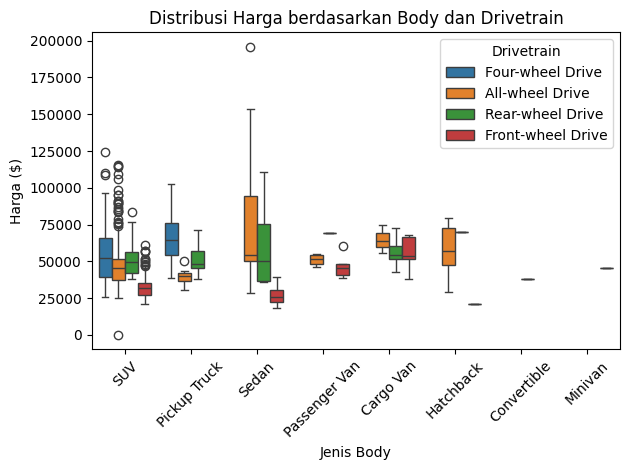

In [44]:
plt.figure()
sns.boxplot(data=df, x="body", y="price", hue="drivetrain")
plt.title("Distribusi Harga berdasarkan Body dan Drivetrain")
plt.xlabel("Jenis Body")
plt.ylabel("Harga ($)")
plt.xticks(rotation=45)
plt.legend(title="Drivetrain")
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi harga kendaraan berdasarkan jenis body (`body`) dan drivetrain (`drivetrain`). Hasil pengamatan menunjukkan:
- **SUV** merupakan tipe body yang paling umum dengan variasi harga yang luas.
- **Pickup Truck** cenderung memiliki median harga yang tinggi, dan sering dikombinasikan dengan drivetrain `Four-wheel Drive`.
- Tipe drivetrain juga memberikan pengaruh yang signifikan terhadap harga, di mana kendaraan dengan `All-wheel Drive` atau `Four-wheel Drive` cenderung memiliki harga lebih tinggi dibandingkan `Front-wheel Drive`.

#### Mileage vs Price berdasarkan Jenis Bahan Bakar

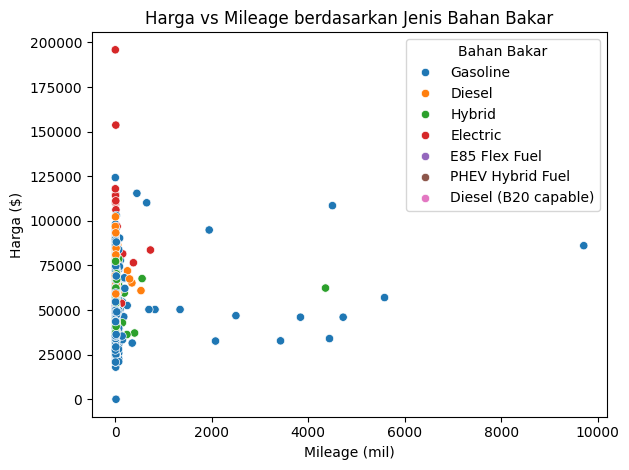

In [45]:
plt.figure()
sns.scatterplot(data=df, x="mileage", y="price", hue="fuel")
plt.title("Harga vs Mileage berdasarkan Jenis Bahan Bakar")
plt.xlabel("Mileage (mil)")
plt.ylabel("Harga ($)")
plt.legend(title="Bahan Bakar")
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan hubungan antara `mileage` (jarak tempuh) dan `price` (harga kendaraan), dengan pewarnaan (`hue`) berdasarkan jenis bahan bakar (`fuel`). Dari grafik terlihat bahwa:
- Secara umum, harga kendaraan cenderung menurun seiring bertambahnya jarak tempuh.
- Kendaraan berbahan bakar **diesel** dan **gasoline** mendominasi data, namun cenderung memiliki pola distribusi harga yang berbeda.
- Beberapa kendaraan tetap memiliki harga tinggi meskipun mileage-nya besar, kemungkinan karena faktor lain seperti tahun produksi atau merek premium.

### Visualisasi (Univariate Analysis)

#### Distribusi Harga Kendaraan

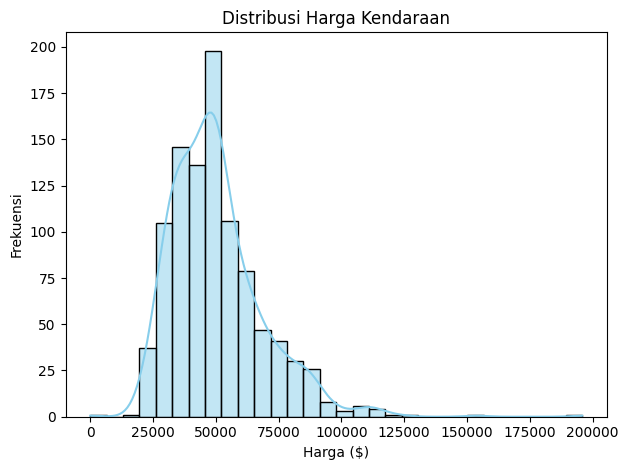

In [46]:
plt.figure()
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Harga Kendaraan")
plt.xlabel("Harga ($)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

Grafik ini memperlihatkan distribusi harga dari seluruh kendaraan dalam dataset. Mayoritas kendaraan memiliki harga di kisaran **$30.000 hingga $60.000**, dengan penurunan frekuensi pada harga-harga yang lebih tinggi. Kurva KDE (Kernel Density Estimate) menunjukkan bahwa distribusi cenderung miring ke kanan, mengindikasikan adanya sejumlah kendaraan dengan harga yang jauh lebih tinggi (outlier).


#### 10 Merek Kendaraan Terbanyak

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9396\1786737268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')


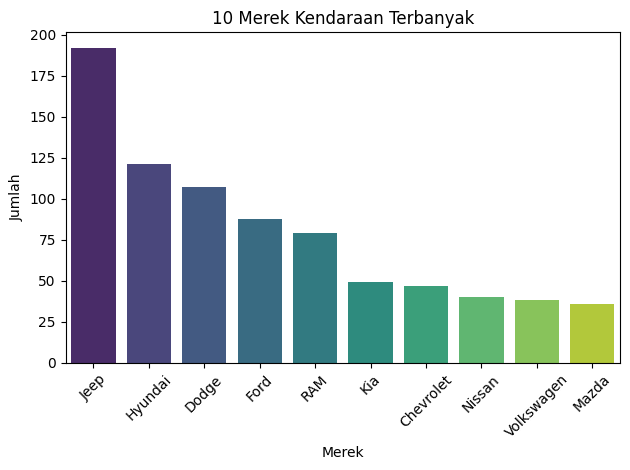

In [47]:
plt.figure()
top_makes = df['make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title("10 Merek Kendaraan Terbanyak")
plt.xlabel("Merek")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan sepuluh merek kendaraan yang paling banyak muncul dalam dataset. **Jeep, RAM, dan Dodge** mendominasi jumlah entri. Hal ini menunjukkan bahwa dataset memiliki dominasi merek tertentu yang kemungkinan berasal dari dealer atau sumber data spesifik. Informasi ini penting karena merek dapat menjadi salah satu faktor utama dalam model prediksi harga.

#### Distribusi Jenis Bahan Bakar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9396\2015213342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fuel", palette='pastel')


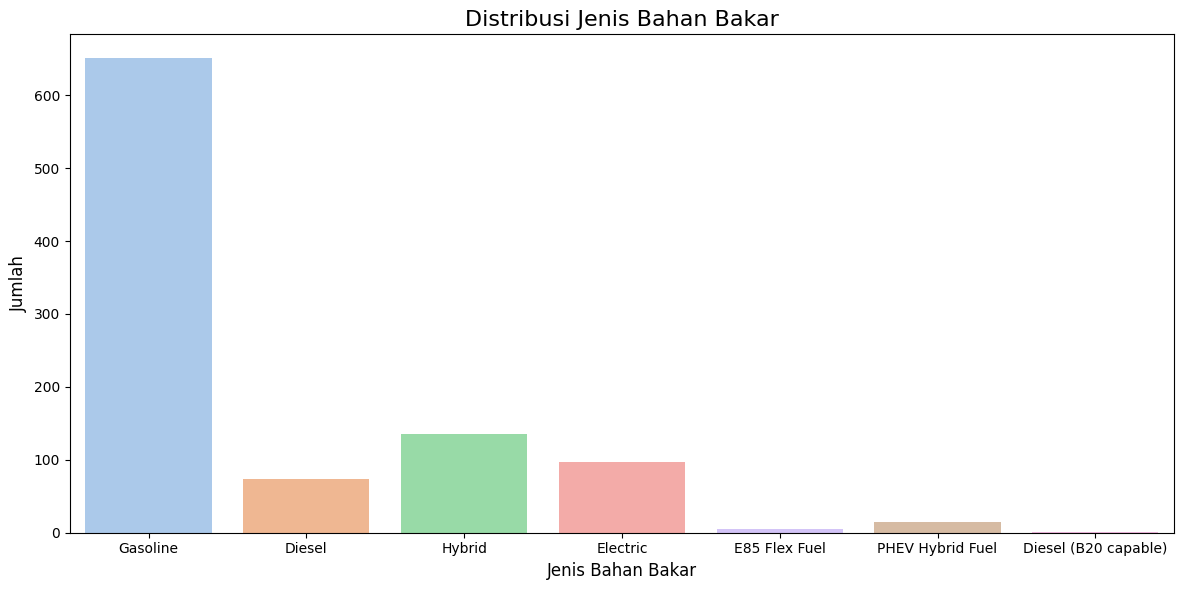

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="fuel", palette='pastel')
plt.title("Distribusi Jenis Bahan Bakar", fontsize=16)
plt.xlabel("Jenis Bahan Bakar", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Plot ini menggambarkan jumlah kendaraan berdasarkan jenis bahan bakarnya. Terlihat bahwa **Gasoline** adalah bahan bakar yang paling umum, diikuti oleh **Diesel** dan jenis lainnya. Data ini penting untuk mengetahui preferensi pasar dan juga dapat digunakan sebagai variabel dalam prediksi harga, karena bahan bakar dapat memengaruhi nilai kendaraan.

#### Visualisasi semua kolom numerik

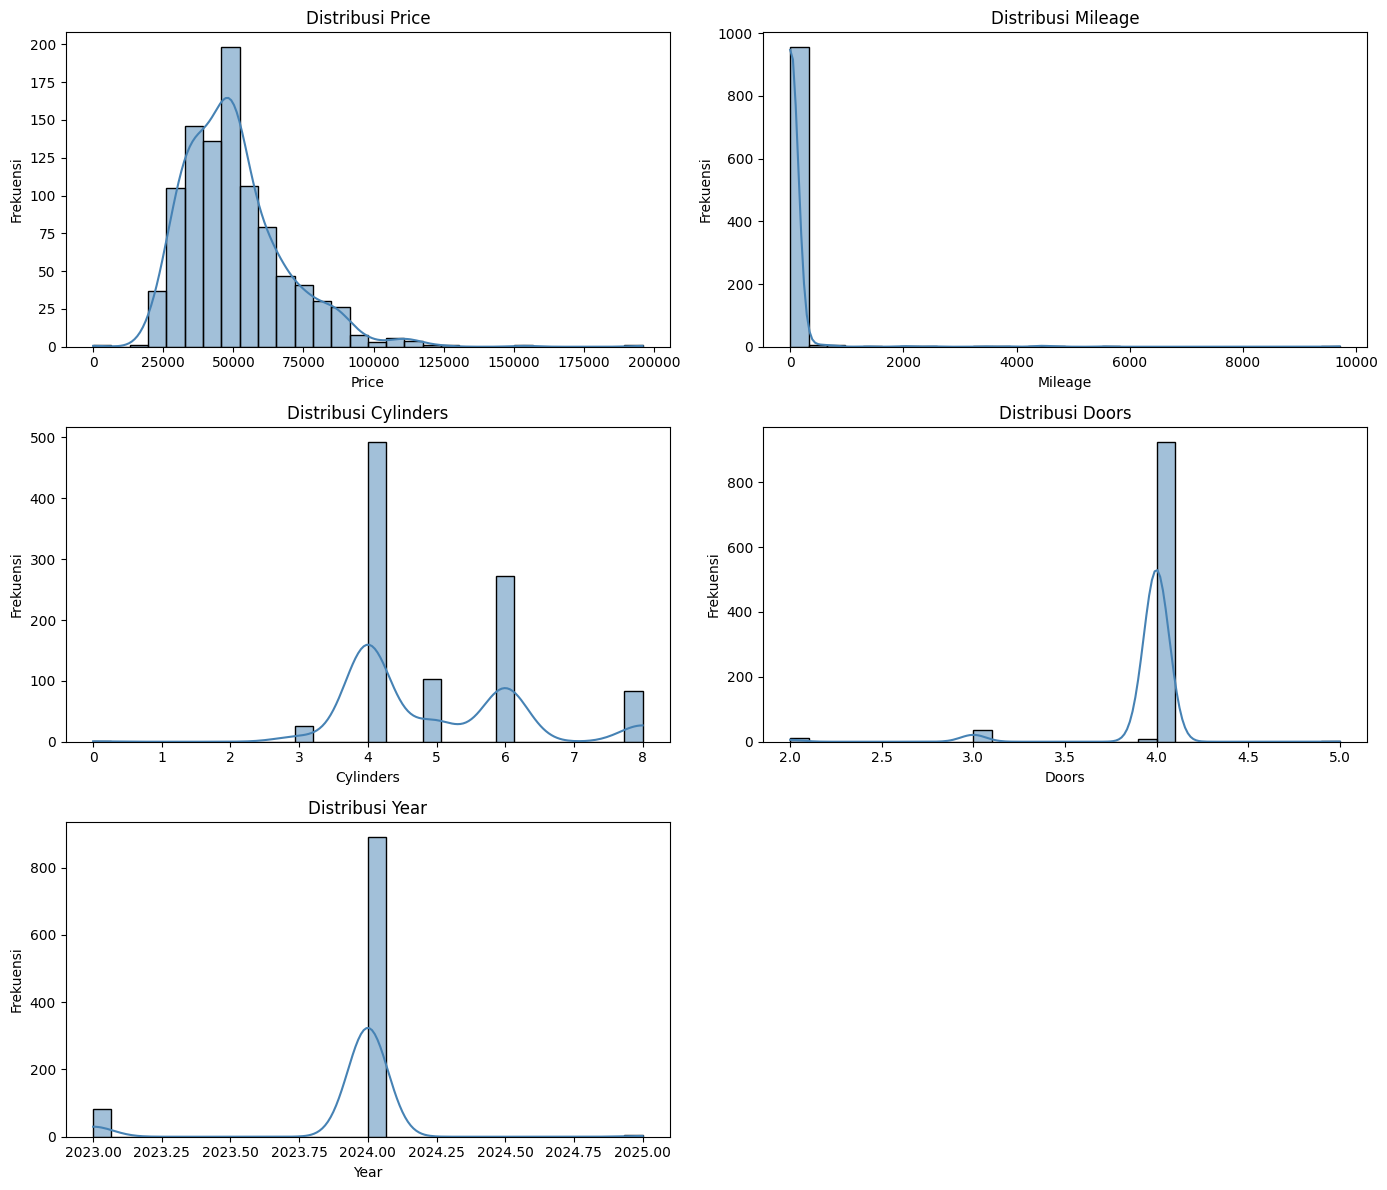

In [49]:
numerical_cols = ['price', 'mileage', 'cylinders', 'doors', 'year']

num_cols = len(numerical_cols)
rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribusi {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frekuensi')

# Hapus sisa subplot jika jumlah kolom ganjil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **Price**: Harga kendaraan menunjukkan distribusi miring ke kanan. Sebagian besar kendaraan berada di kisaran $30.000–$60.000, namun terdapat outlier dengan harga di atas $100.000.
2. **Mileage**: Sebagian besar kendaraan memiliki jarak tempuh rendah, antara 0–20 mil. Namun, terdapat beberapa kendaraan dengan mileage sangat tinggi yang menjadi outlier.
3. **Cylinders**: Nilai silinder paling umum adalah 4 dan 6, dengan sedikit kendaraan yang memiliki 8 silinder. Ini mencerminkan standar industri otomotif.
4. **Doors**: Sebagian besar kendaraan memiliki 4 pintu. Nilai lainnya seperti 2 atau 5 pintu jauh lebih sedikit.
5. **Year**: Mayoritas kendaraan adalah keluaran tahun 2024, menunjukkan bahwa dataset ini lebih fokus pada kendaraan baru.

#### Visualisasi semua kolom kategorikal

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9396\1978448180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i], palette='Set2')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9396\1978448180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i], palette='Set2')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9396\1978448180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_

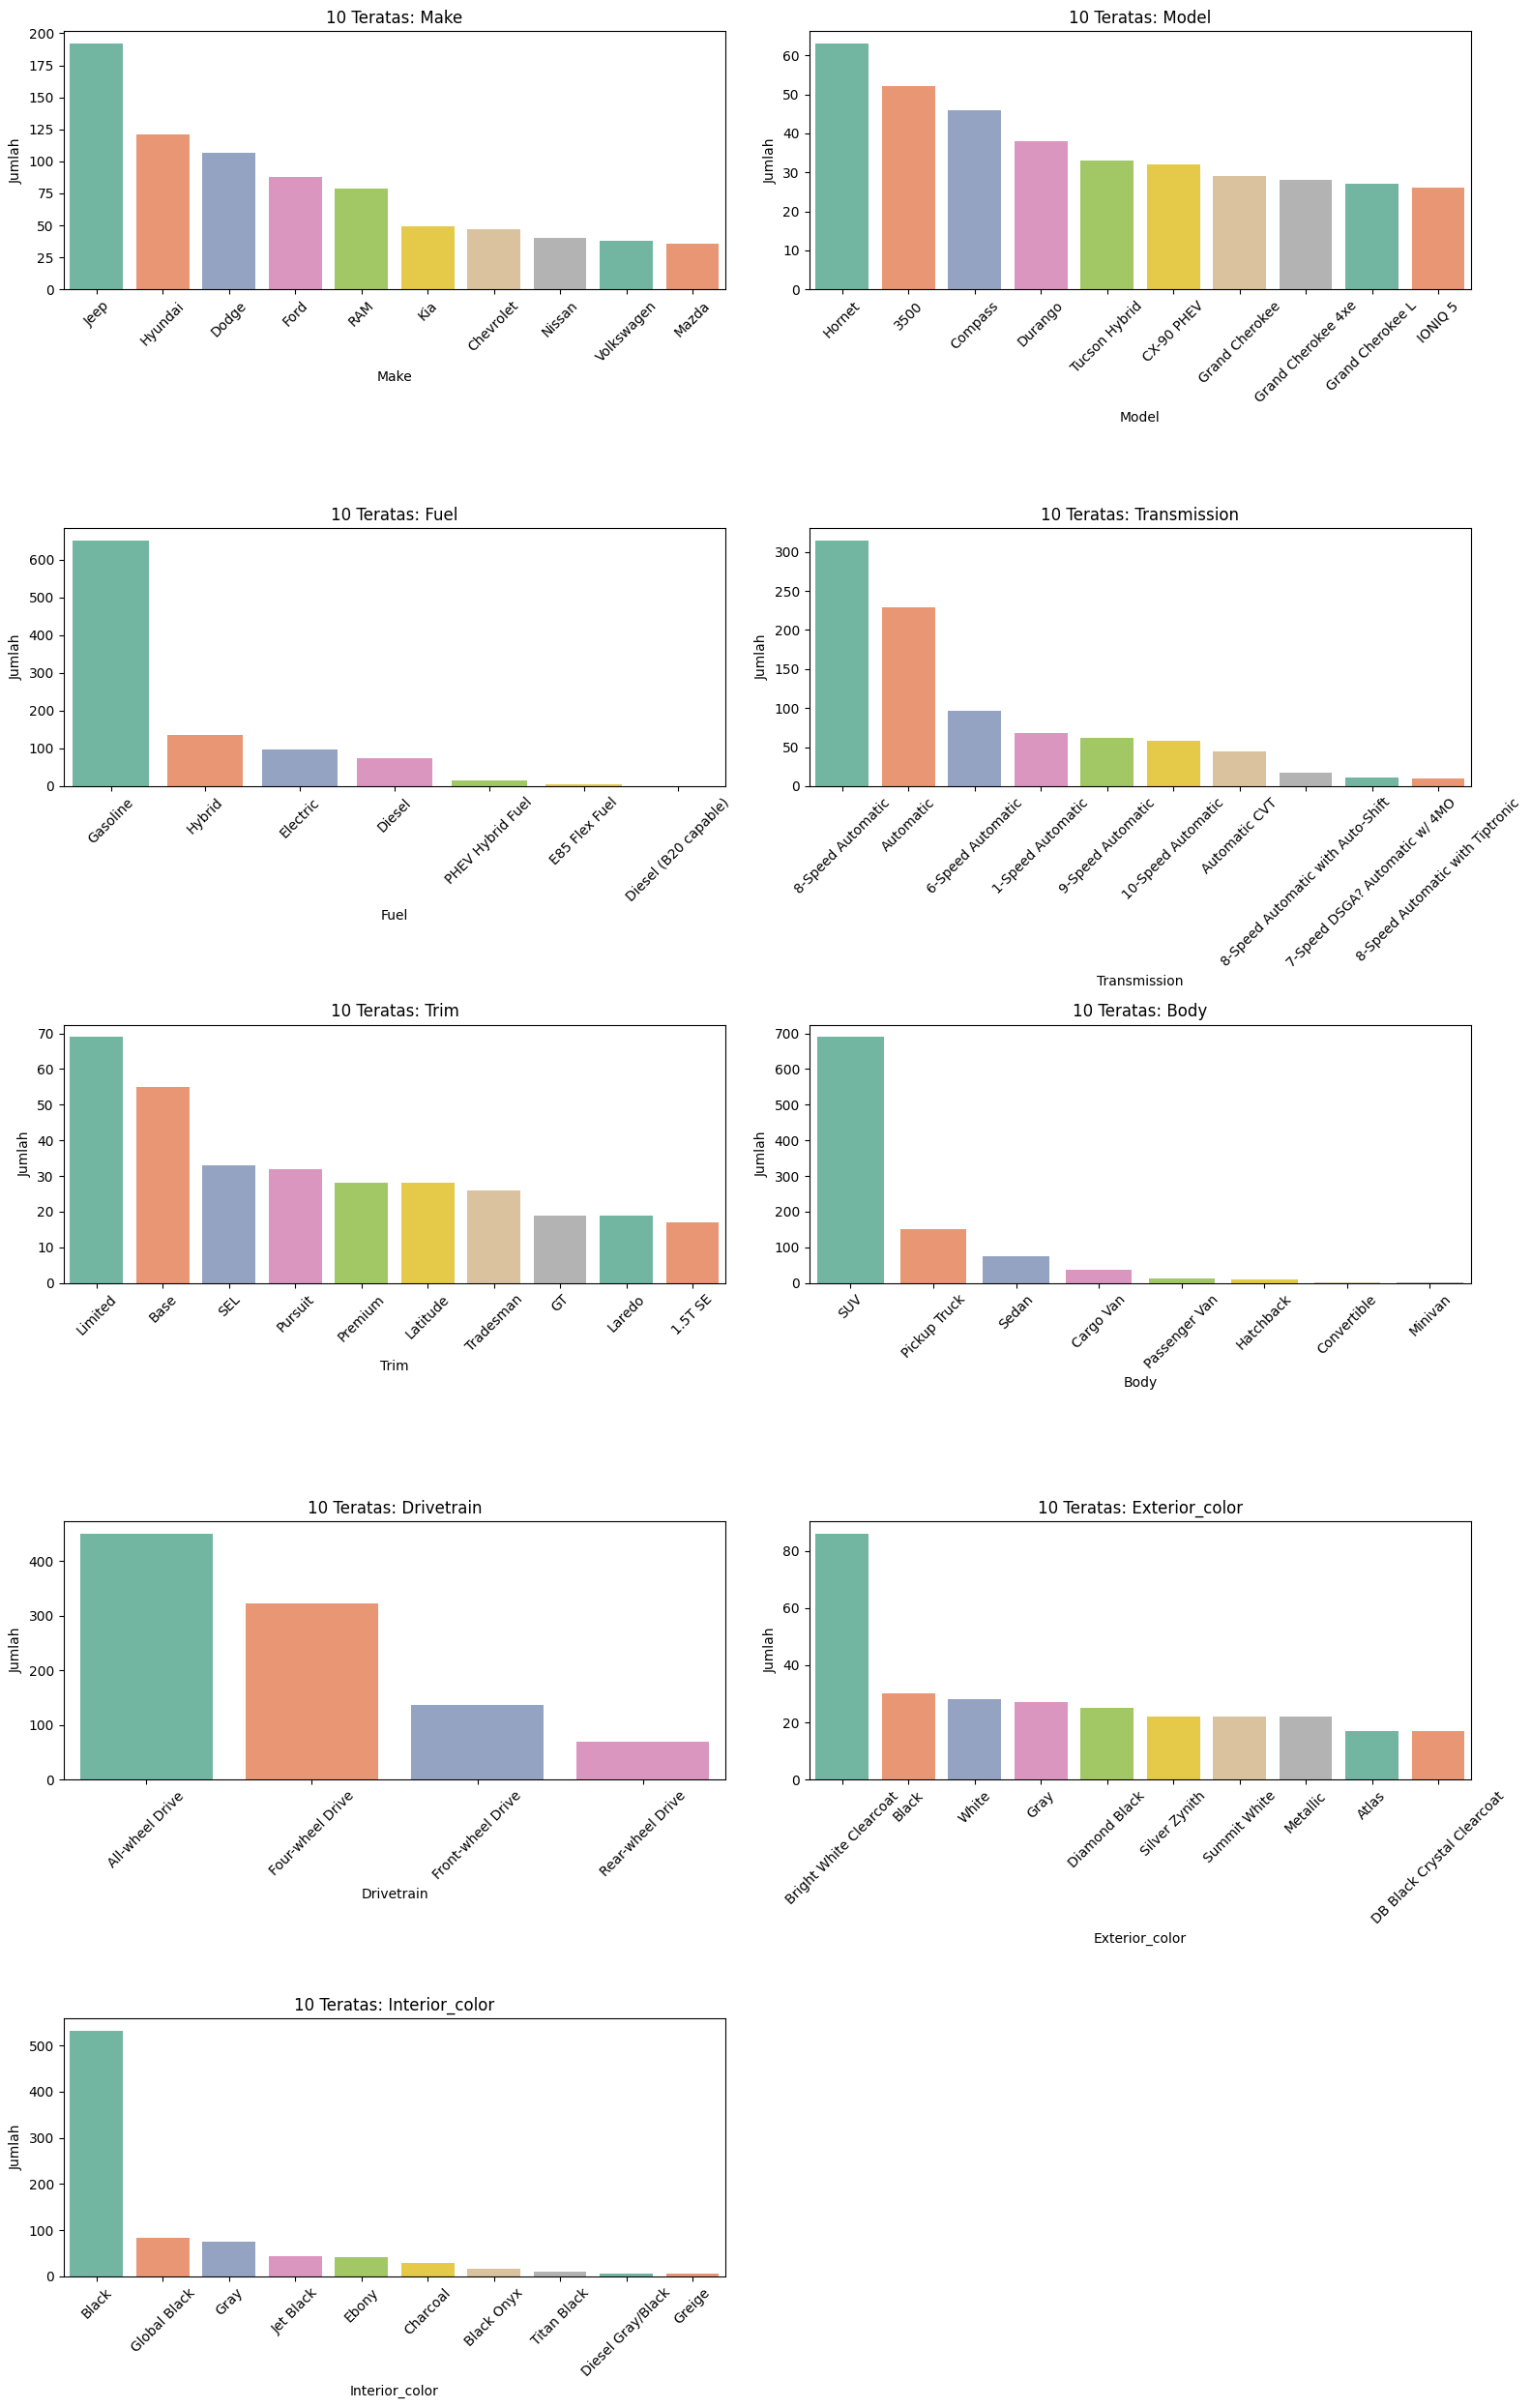

In [50]:
categorical_cols = ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 
                    'drivetrain', 'exterior_color', 'interior_color']

cat_cols = len(categorical_cols)
rows = math.ceil(cat_cols / 2)

fig, axes = plt.subplots(rows, 2, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().nlargest(10)  # Top 10 kategori
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i], palette='Set2')
    axes[i].set_title(f'10 Teratas: {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus sisa subplot jika jumlah kolom ganjil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **Make**: Merek kendaraan yang paling umum adalah Jeep, RAM, dan Dodge. Hal ini dapat menunjukkan dominasi merek tertentu dalam dataset.
2. **Model**: Beberapa model populer seperti Grand Cherokee dan 1500 muncul lebih sering. Namun, banyak model hanya muncul 1–2 kali.
3. **Fuel**: Jenis bahan bakar terbanyak adalah **Gasoline**, disusul oleh **Diesel**. Jenis bahan bakar lainnya sangat sedikit.
4. **Transmission**: Sebagian besar kendaraan menggunakan transmisi **Automatic** atau **8-Speed Automatic**.
5. **Trim**: Beberapa trim seperti Laramie, Big Horn, dan Denali cukup sering muncul. Trim mencerminkan varian fitur pada kendaraan.
6. **Body**: Tipe body **SUV** dan **Pickup Truck** mendominasi dataset. Jenis lain seperti sedan sangat sedikit.
7. **Drivetrain**: Jenis penggerak terbanyak adalah **Four-wheel Drive** dan **All-wheel Drive**, yang umum pada kendaraan SUV atau off-road.
8. **Exterior Color**: Warna seperti **White**, **Black**, dan **Silver** adalah warna eksterior yang paling sering digunakan.
9. **Interior Color**: **Black** dan **Global Black** mendominasi interior, mencerminkan tren desain interior yang populer.

## Data Preprocessing

### Drop Columns

In [51]:
# Drop name dan description
df = df.drop_duplicates().drop(columns=['name', 'description'])

# Kolom yang akan dihapus karena terlalu banyak kategori unik & kurang relevan
drop_cols = ['model', 'engine', 'trim', 'interior_color', 'exterior_color']
df = df.drop(columns=drop_cols)

### Encoding

In [52]:
# Kolom numerik dan kategorikal
numerical_cols = ['year', 'cylinders', 'mileage', 'doors']
categorical_cols_onehot = ['fuel', 'transmission', 'body', 'drivetrain']
categorical_cols_label = ['make'] 

#### One Hot Encoding

In [53]:
# One-hot encoding untuk kategori sederhana
df = pd.get_dummies(df, columns=categorical_cols_onehot, drop_first=True)

#### Label Encoding

In [54]:
# Label encoding manual untuk kolom 'make'
df['make'] = df['make'].astype('category').cat.codes

In [55]:
df

,make,year,price,cylinders,mileage,doors,fuel_Diesel (B20 capable),fuel_E85 Flex Fuel,fuel_Electric,fuel_Gasoline,...,body_Convertible,body_Hatchback,body_Minivan,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,15,2024,74600.0,6.0,10.0,4.0,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,15,2024,50170.0,6.0,1.0,4.0,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
2,9,2024,96410.0,8.0,0.0,4.0,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
3,7,2023,46835.0,8.0,32.0,4.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,23,2024,81663.0,6.0,10.0,4.0,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,23,2024,69315.0,6.0,0.0,4.0,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
997,21,2024,59037.0,4.0,10.0,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
999,15,2024,69085.0,6.0,20.0,4.0,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1000,22,2024,43495.0,6.0,6.0,4.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


#### Data Splitting

In [56]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
y = df['price']
X = df.drop(columns=['price'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [57]:
print("Shape number X_train dataset: ", X_train.shape)
print("Shape number y_train dataset: ", y_train.shape)
print("Shape number X_test dataset: ", X_test.shape)
print("Shape number y_test dataset: ", y_test.shape)

Shape number X_train dataset:  (782, 58)
Shape number y_train dataset:  (782,)
Shape number X_test dataset:  (196, 58)
Shape number y_test dataset:  (196,)


Membagi dataset menjadi 80/20 untuk di modelling

### Modelling

Untuk modelling regresi, menggunakan 4 algoritma yaitu Linear Regression, Random Forest, Decision Tree, dan KNN.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=36),
    'Decision Tree': DecisionTreeRegressor(random_state=36),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })

### Result

In [59]:
# Tampilkan hasil
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df

,Model,MAE,RMSE,R2 Score
1,Random Forest,5695.852381,10608.849381,0.702012
2,Decision Tree,6226.551175,11542.996621,0.647224
0,Linear Regression,9316.225933,14800.179055,0.420043
3,K-Nearest Neighbors,8408.065070,14922.225010,0.410438


Tabel diatas merupakan hasil dari pengurutan evaluasi yang dilakukan, dapat dilihat bahwa Random Forest merupakan model yang mendapat akurasi (R2 Score) tertinggi daripada model yang lainnya.

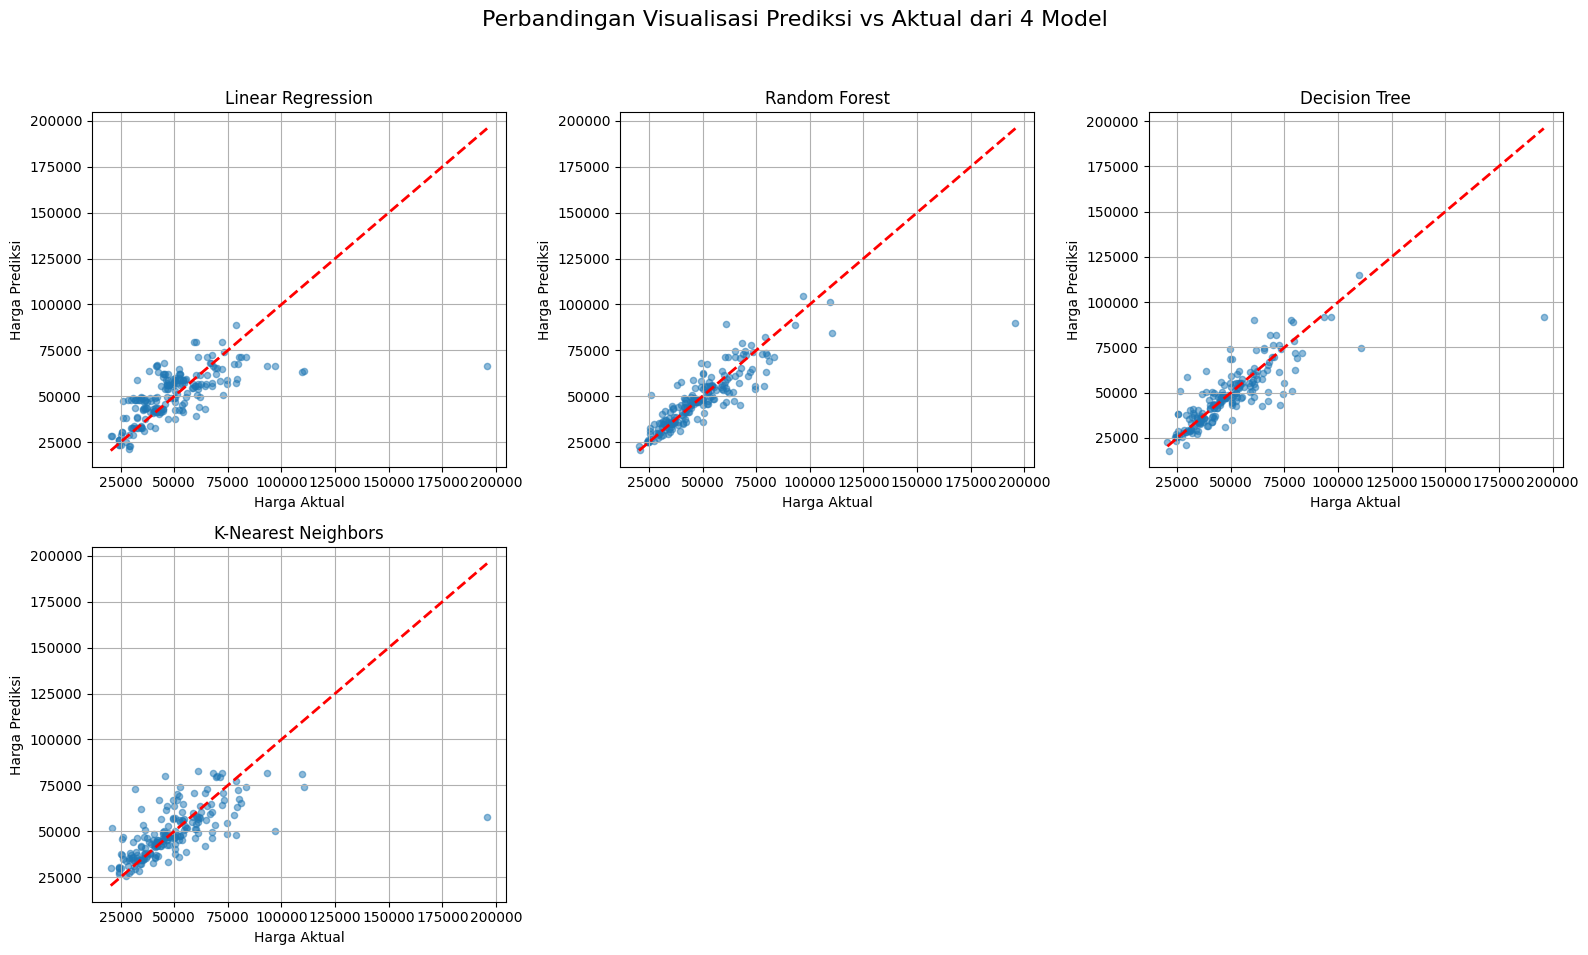

In [60]:
# Siapkan plot
plt.figure(figsize=(16, 10))

# Loop semua model
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(name)
    plt.xlabel('Harga Aktual')
    plt.ylabel('Harga Prediksi')
    plt.grid(True)

plt.suptitle('Perbandingan Visualisasi Prediksi vs Aktual dari 4 Model', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Terlihat visualisasi prediksi harga kendaraan dari ke-empat model tersebut.

## Kesimpulan

Berdasarkan evaluasi terhadap empat model regresi — yaitu Random Forest, Decision Tree, Linear Regression, dan K-Nearest Neighbors (KNN) diperoleh bahwa:

- Random Forest Regressor menunjukkan performa terbaik dengan nilai MAE sebesar 5.695, RMSE sebesar 10.608, dan R2 Score sebesar 0.702. Artinya, model ini mampu menjelaskan sekitar 70% variasi harga kendaraan dengan kesalahan prediksi rata-rata sekitar Rp 5,7 juta. Hal ini menunjukkan bahwa Random Forest cukup andal dan akurat dalam menangani data harga kendaraan yang kompleks dan bervariasi.

- Decision Tree menempati urutan kedua dengan R2 Score 0.647, masih tergolong baik namun tidak sekuat Random Forest. Model ini memiliki error yang lebih tinggi, menandakan bahwa meskipun mampu menangkap pola, ia lebih rentan terhadap overfitting.

- Linear Regression dan K-Nearest Neighbors menghasilkan skor R2 di bawah 0.5, menunjukkan bahwa keduanya tidak cukup kuat dalam memodelkan hubungan non-linear atau kompleks antar fitur. Kedua model ini memiliki error yang cukup besar, sehingga kurang direkomendasikan untuk digunakan pada data ini.

Secara keseluruhan, pendekatan ensemble seperti Random Forest terbukti lebih efektif dalam menangani data regresi dengan banyak fitur kategorikal dan variabel yang kompleks.